In [2]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model
import seis_numerics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [7]:
data=kgs.load_all_train_data(validation_only=True)[1500:2000][::2]
data=kgs.load_all_train_data(validation_only=True)[500:1000][::2]
np.random.default_rng(seed=0).shuffle(data)
print(data[0].family)

CurveFault_B


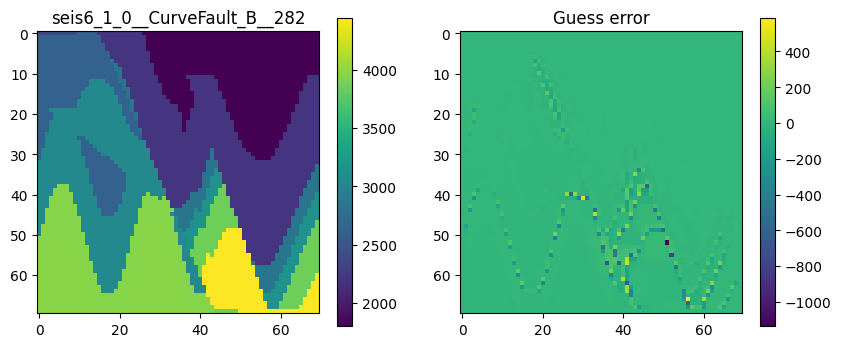

diag 0.0
diag 3.261767350895619e-05


C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


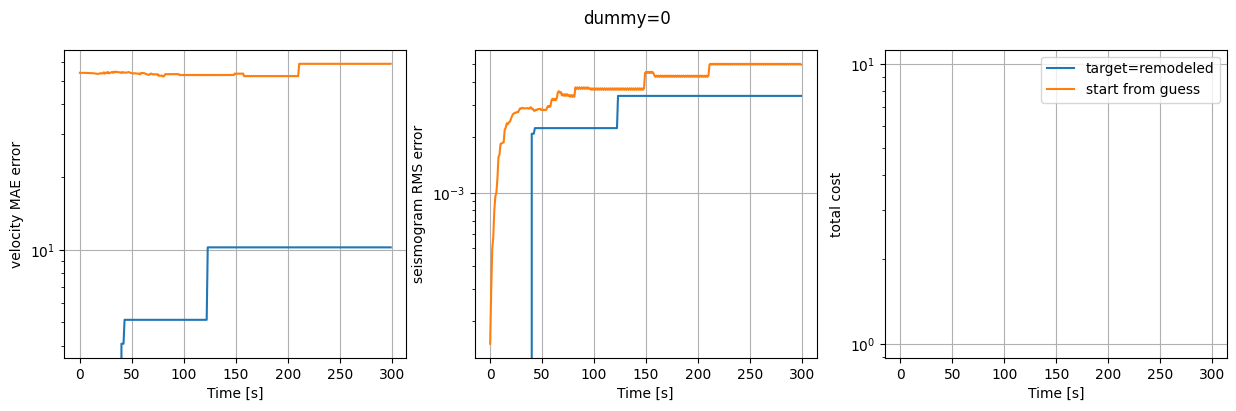

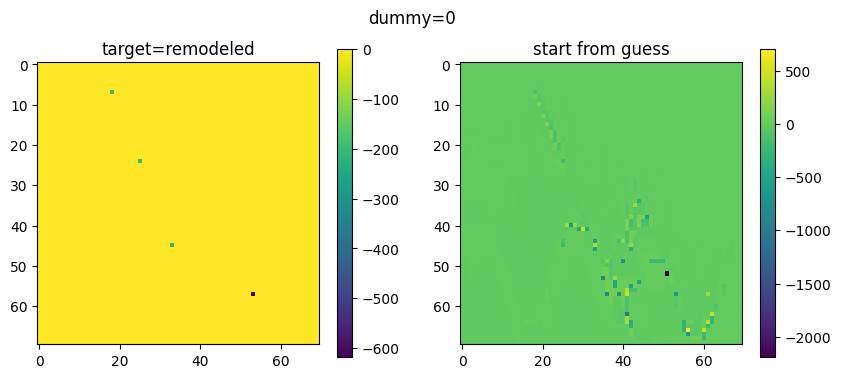

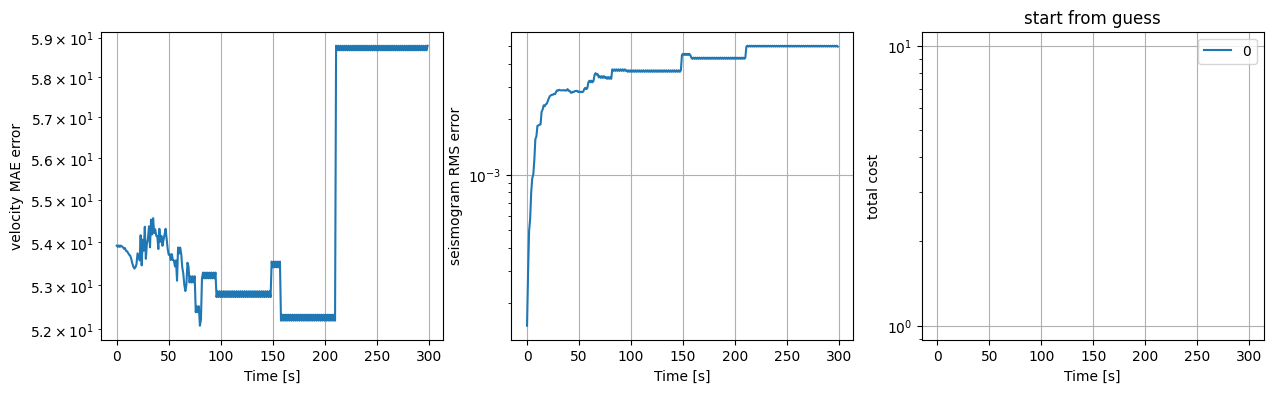

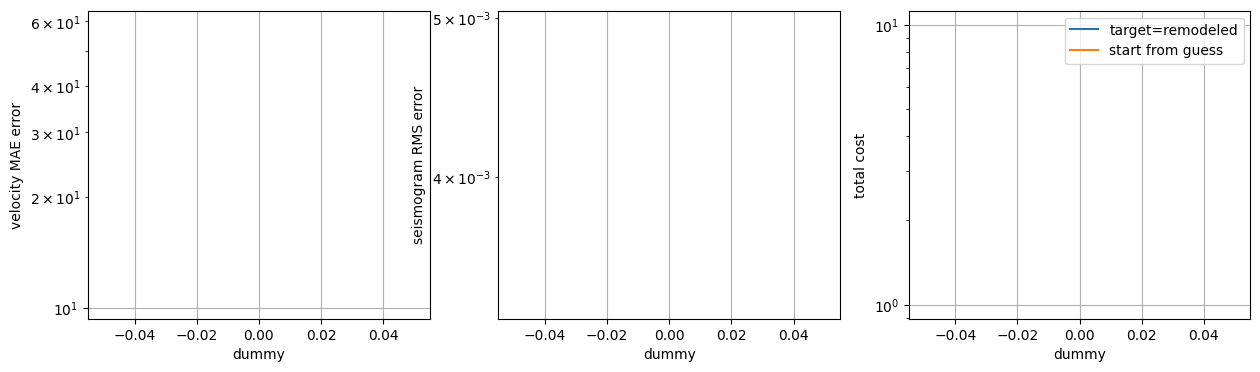

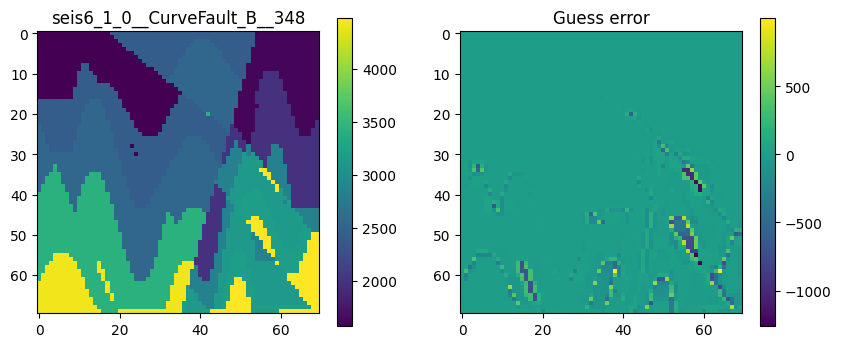

diag 0.0
diag 3.6893752018810926e-05


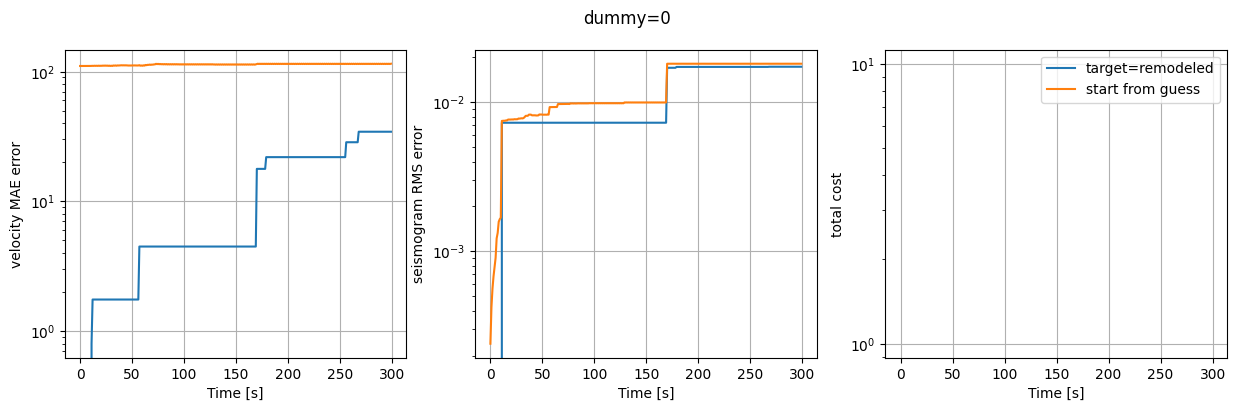

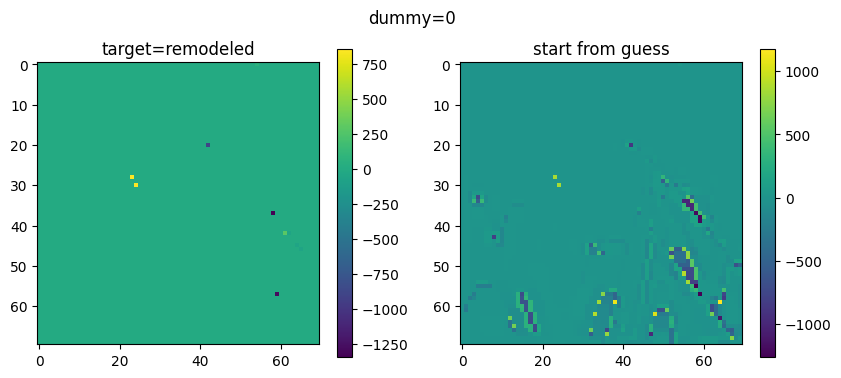

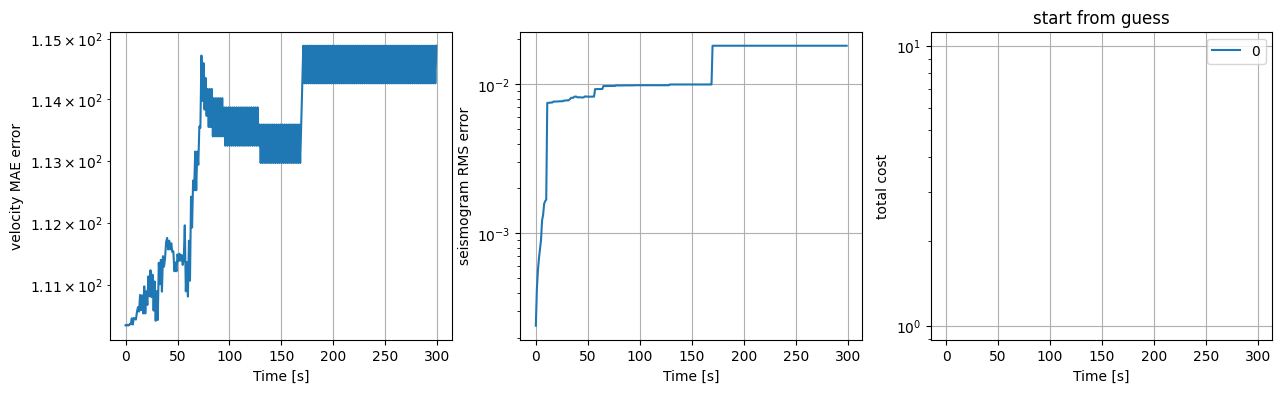

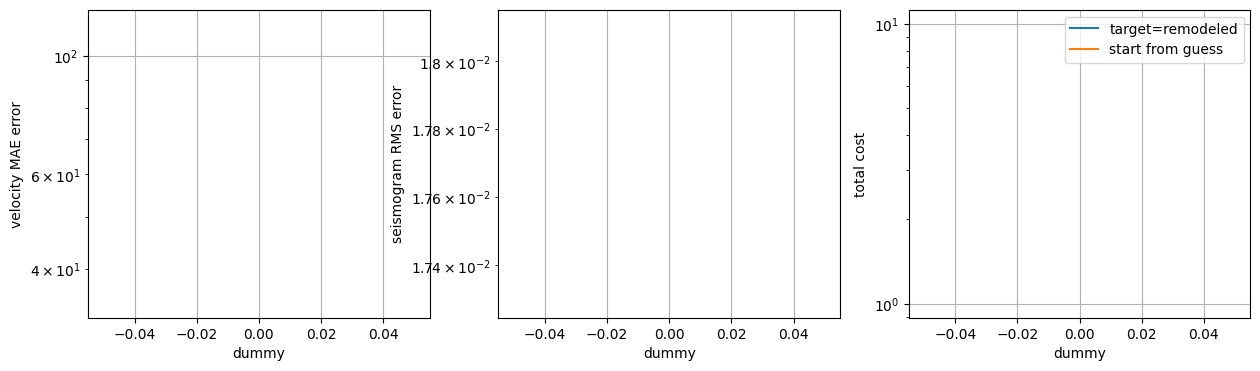

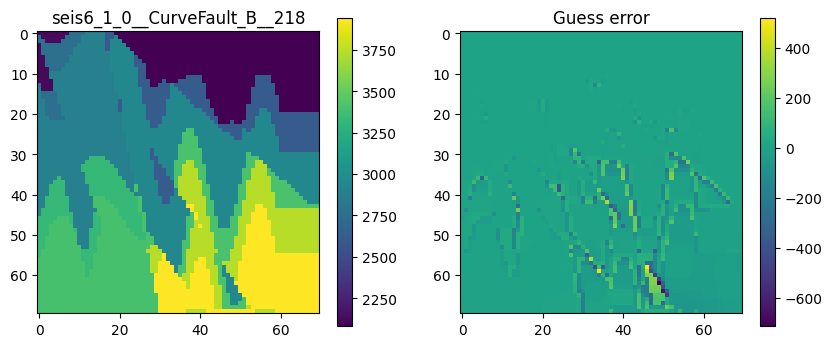

diag 0.0
diag 1.5265436602509395e-05


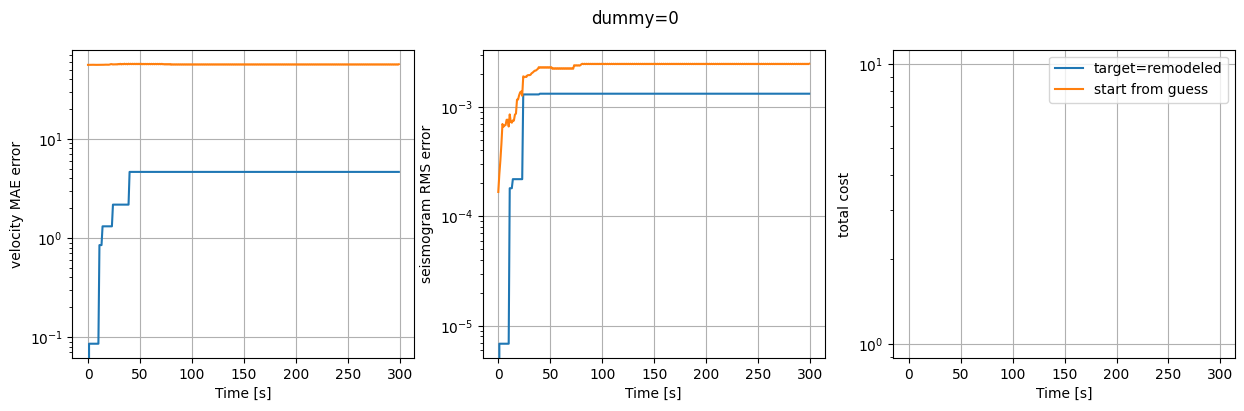

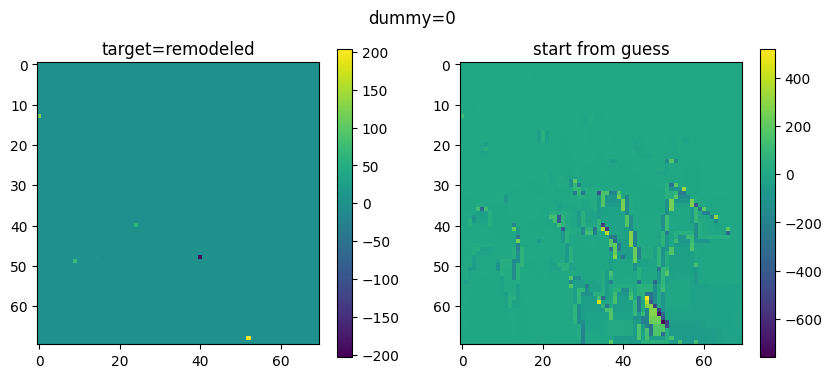

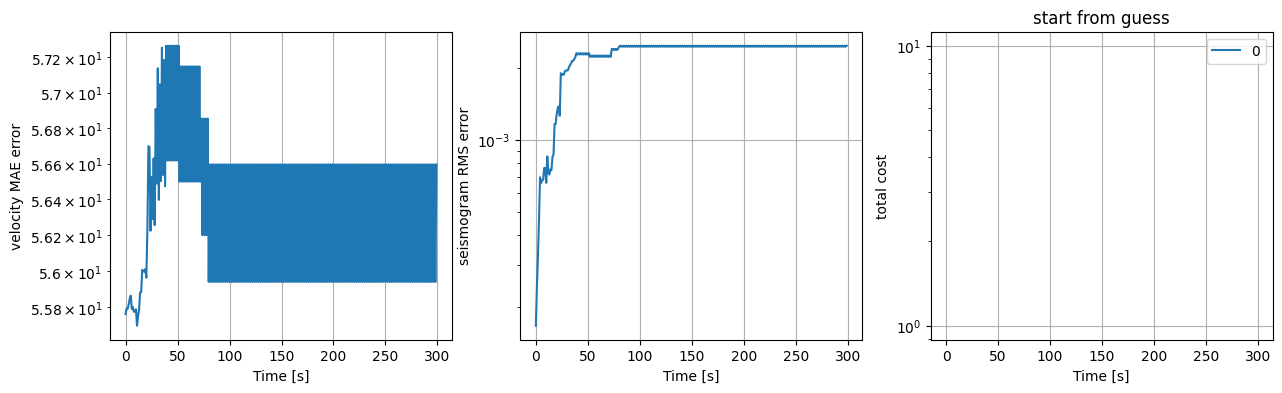

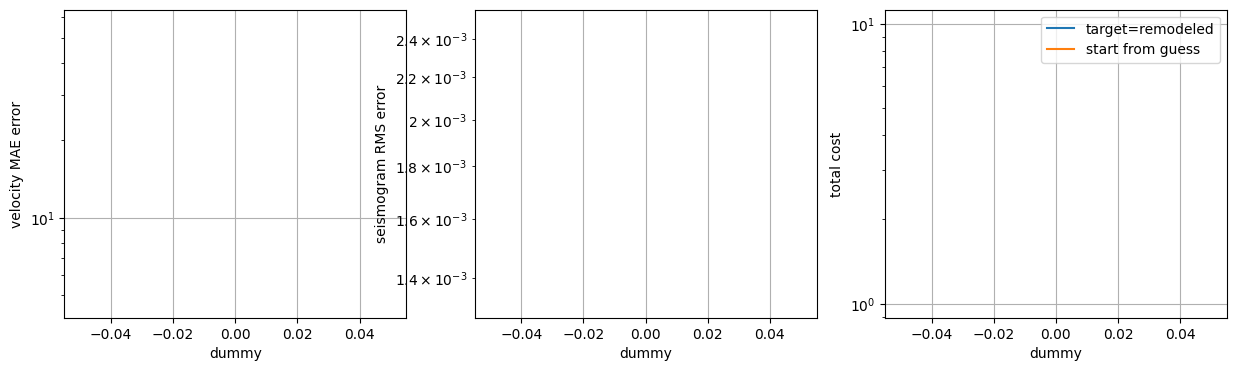

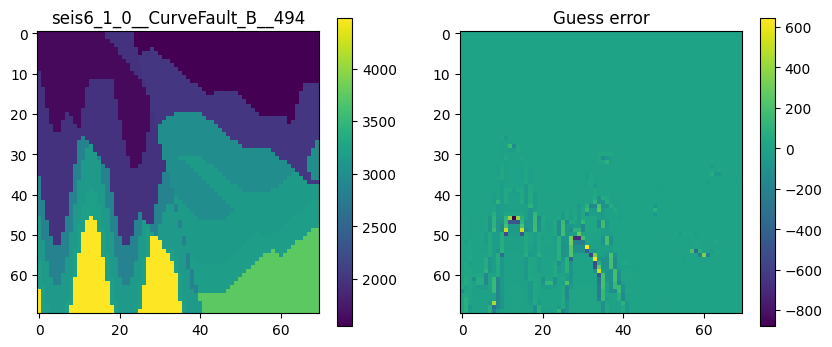

diag 0.0
diag 3.396060660252737e-05


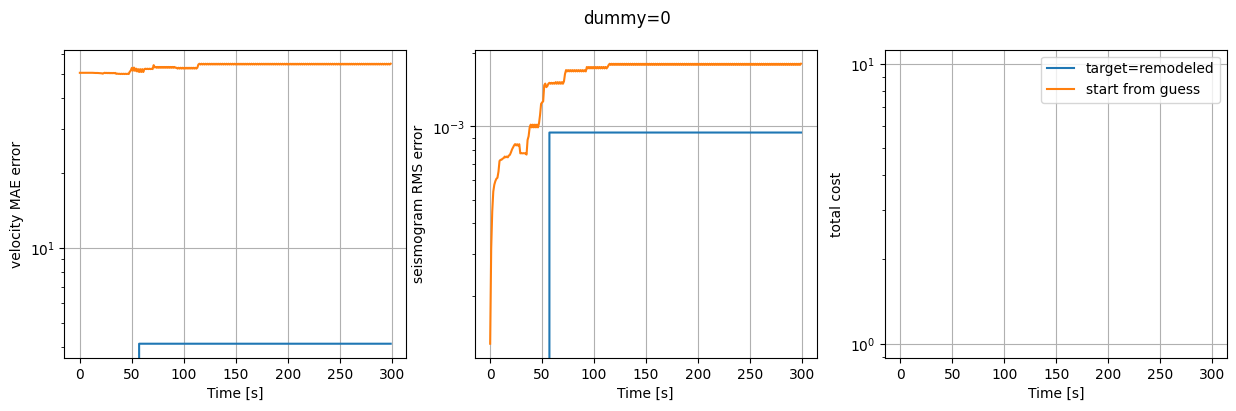

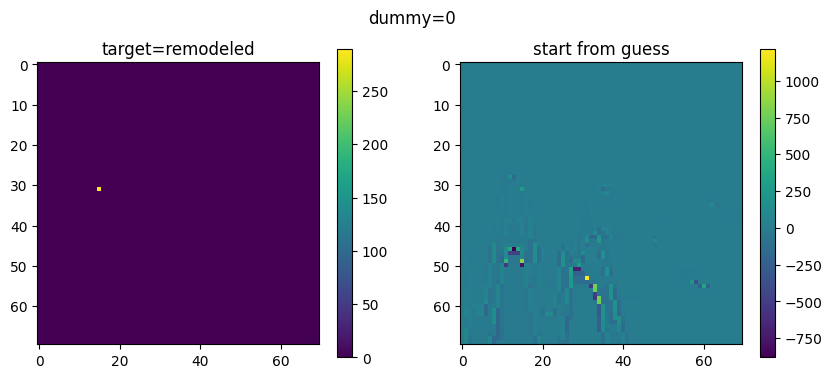

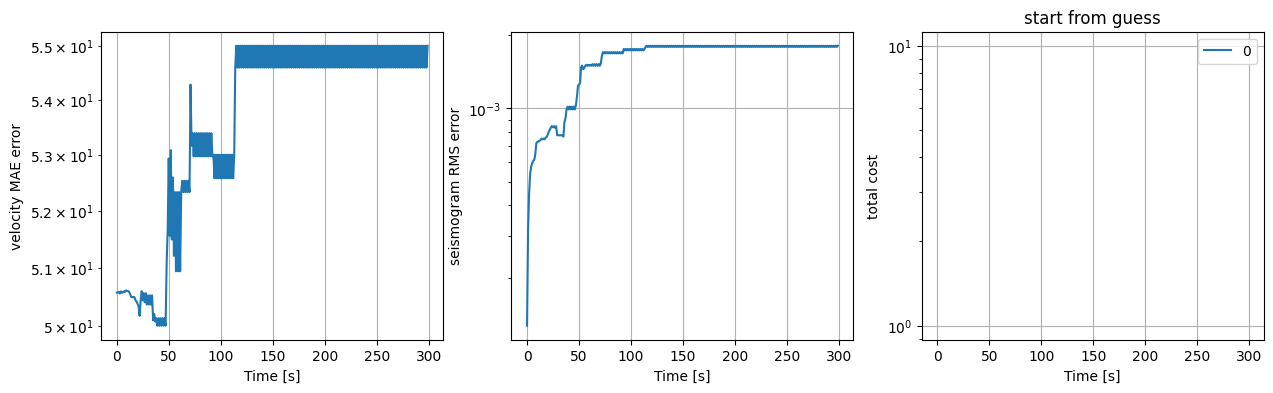

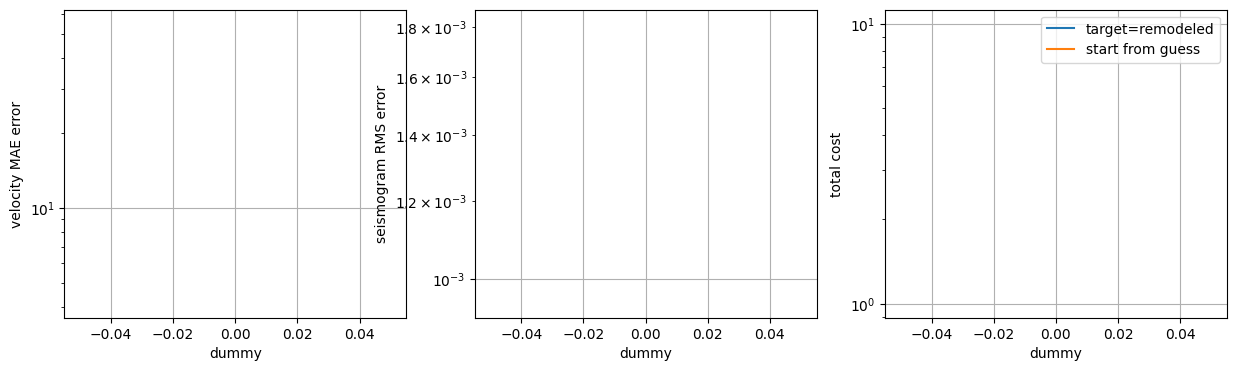

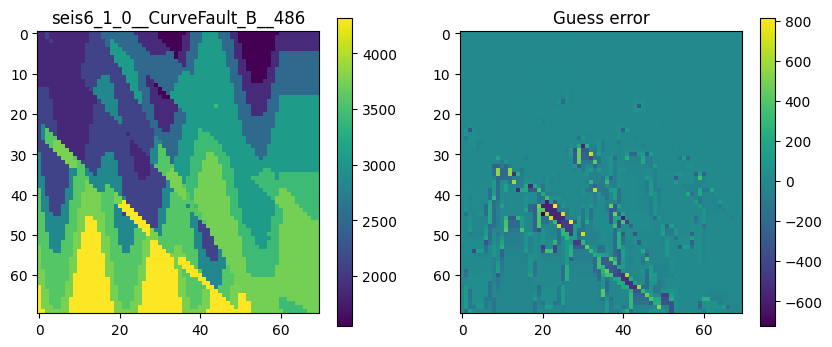

diag 0.0
diag 2.858712819446162e-05


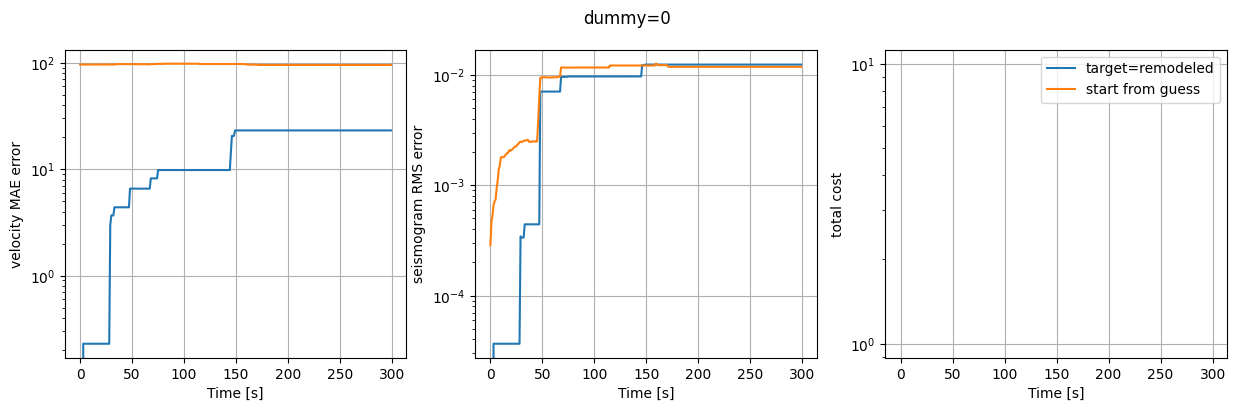

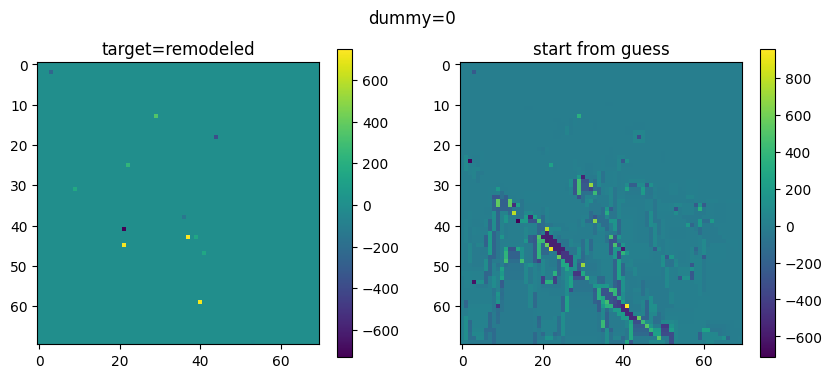

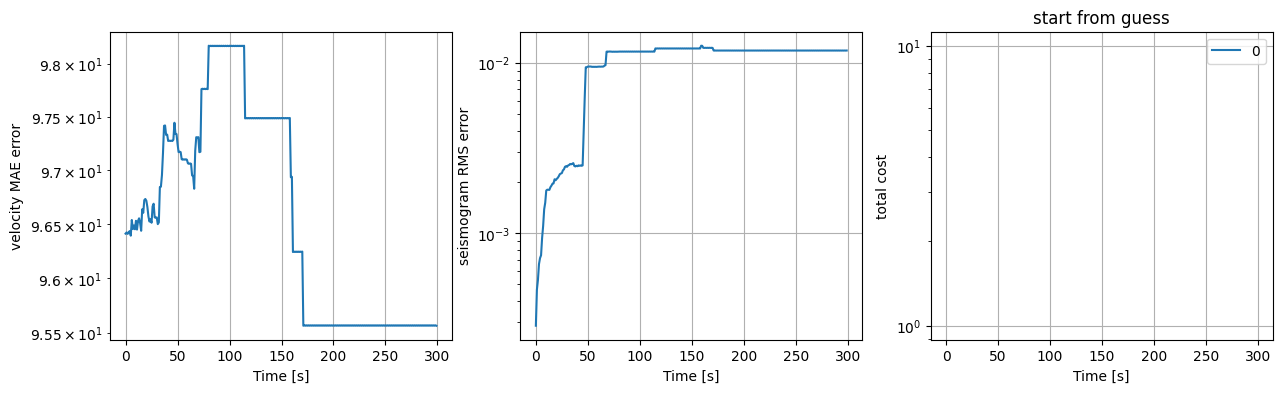

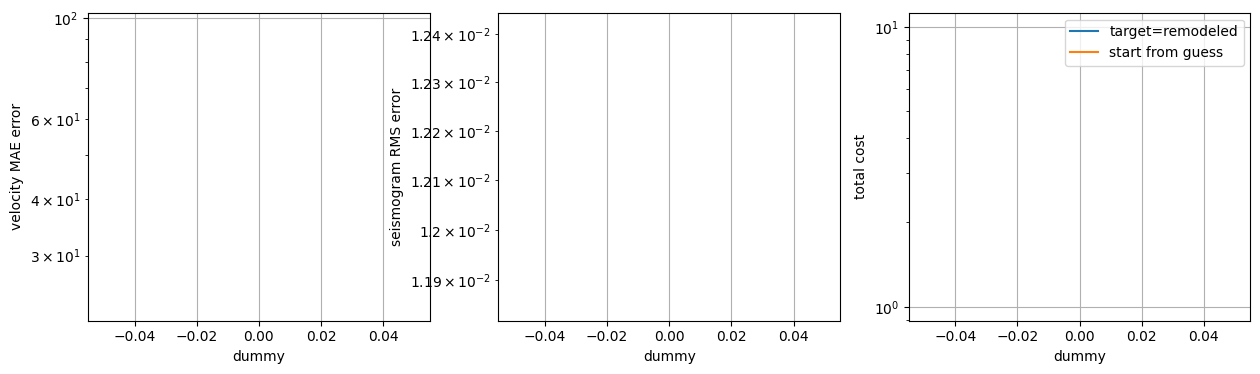

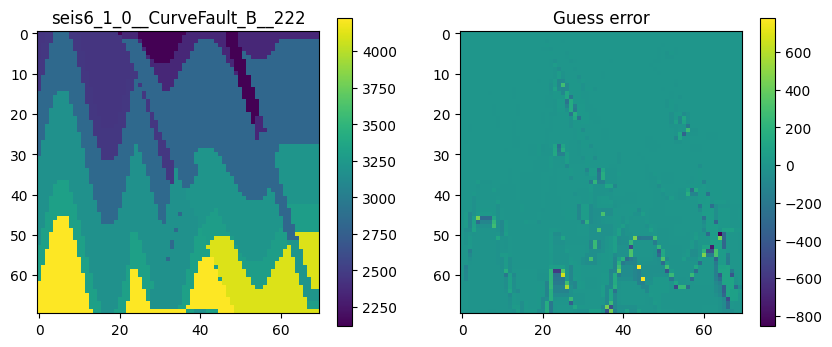

diag 0.0
diag 3.1360050954424034e-05


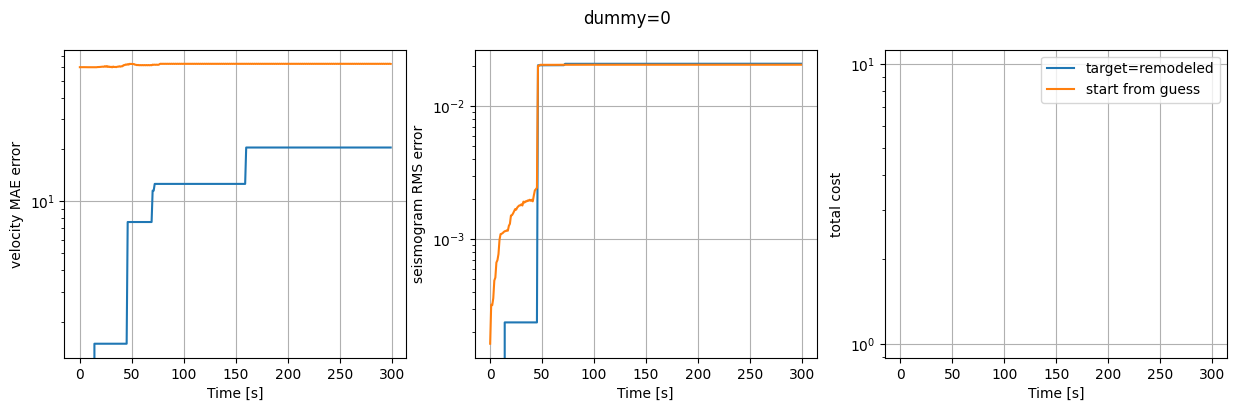

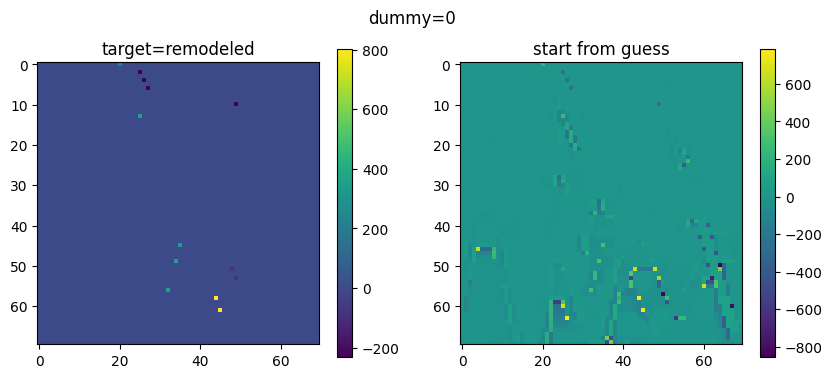

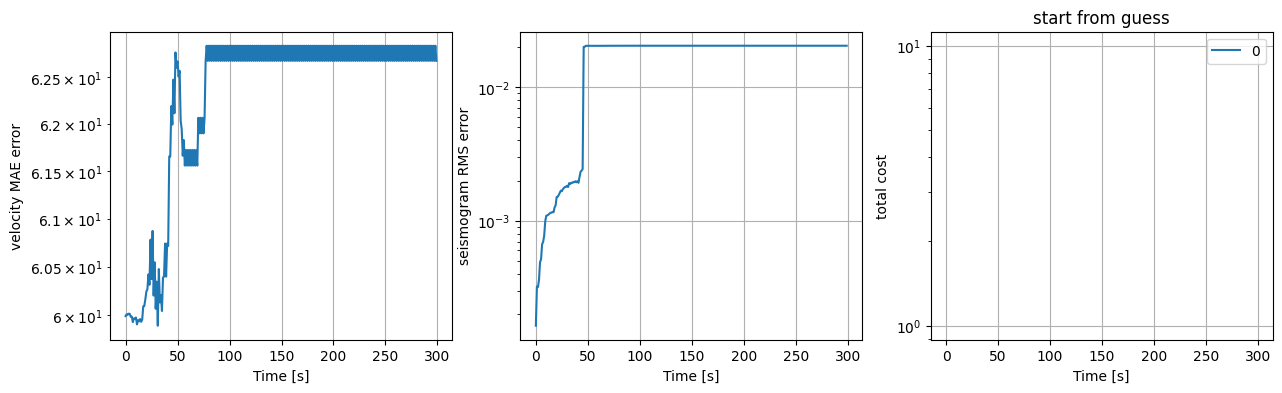

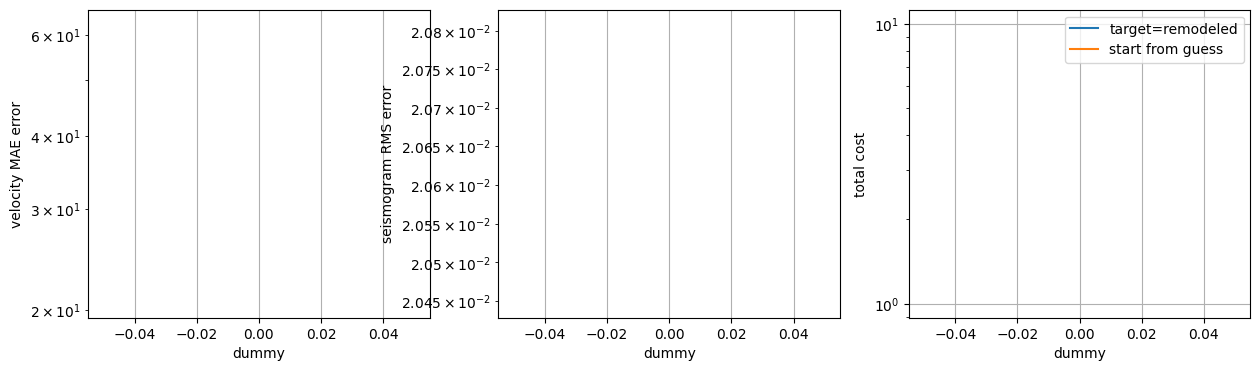

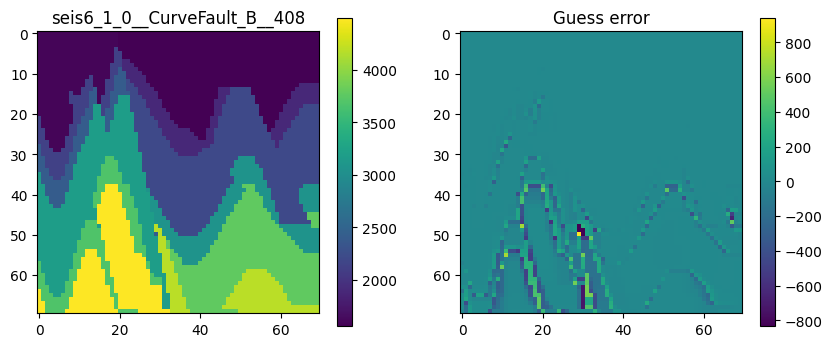

diag 0.0
diag 2.1893809923126974e-05


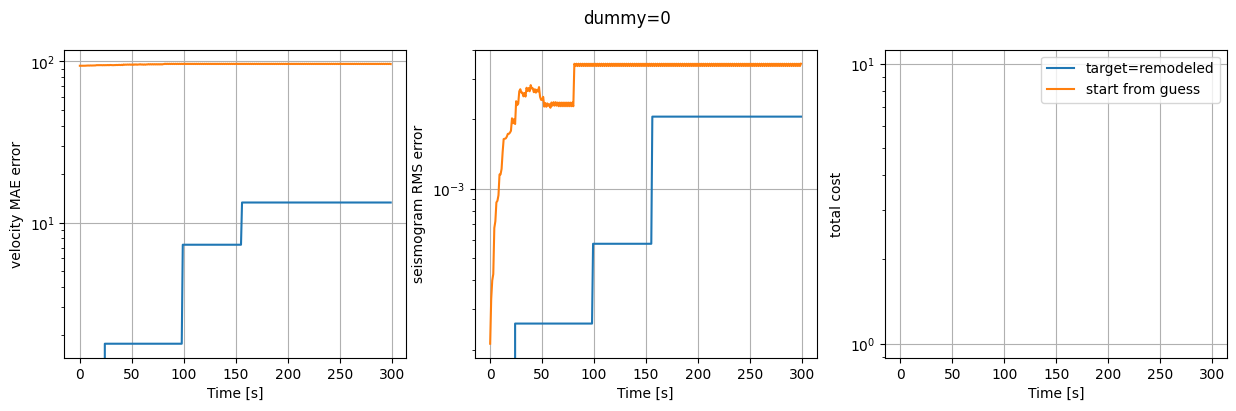

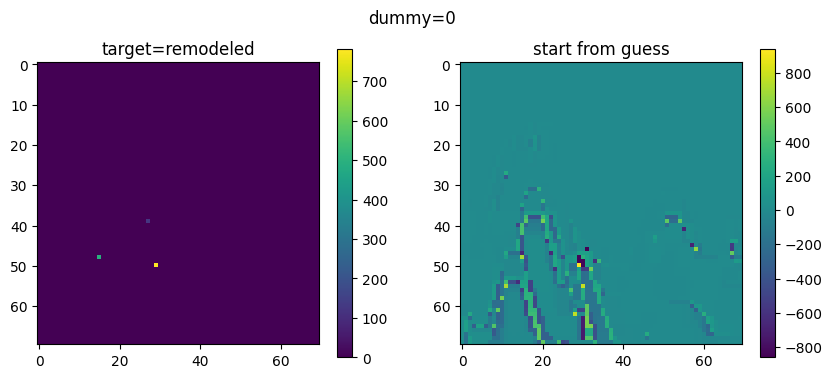

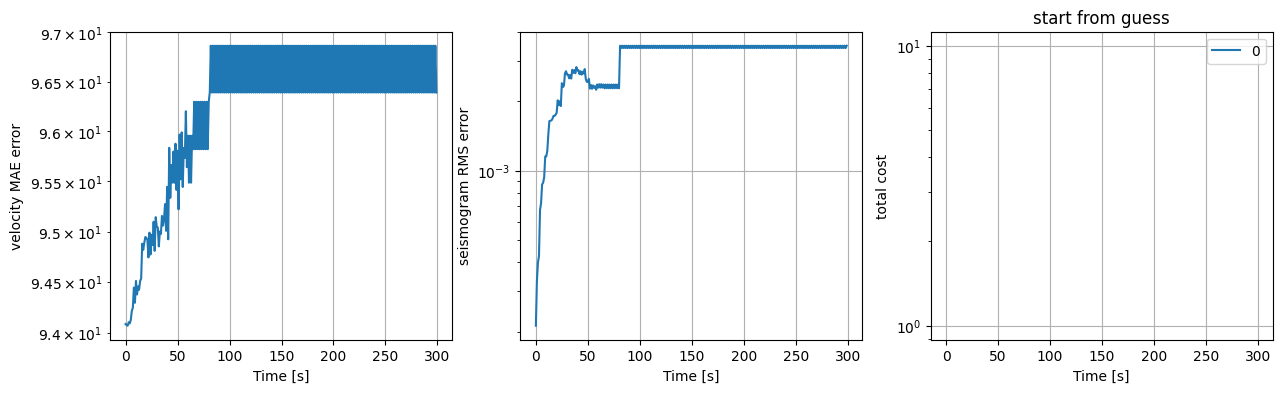

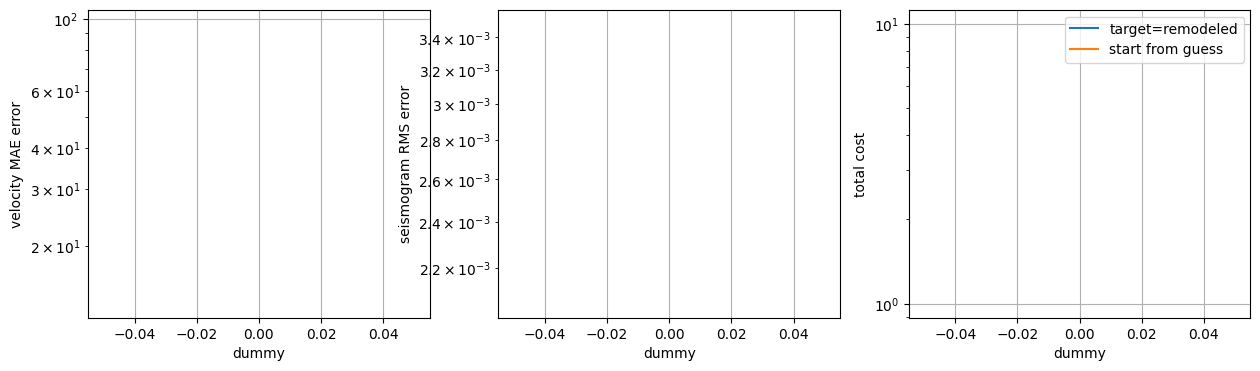

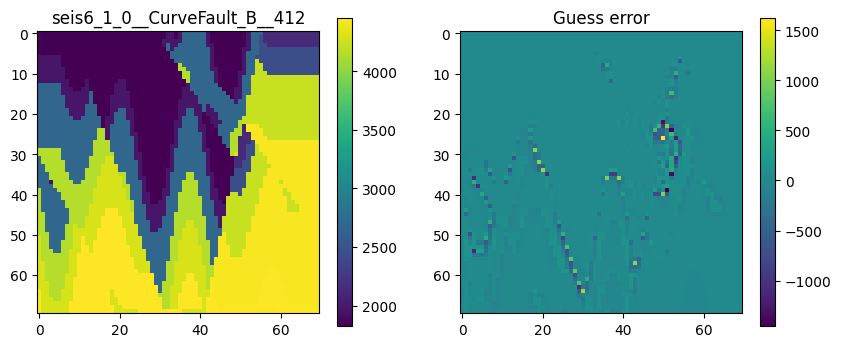

diag 0.0
diag 2.0252871357521773e-05


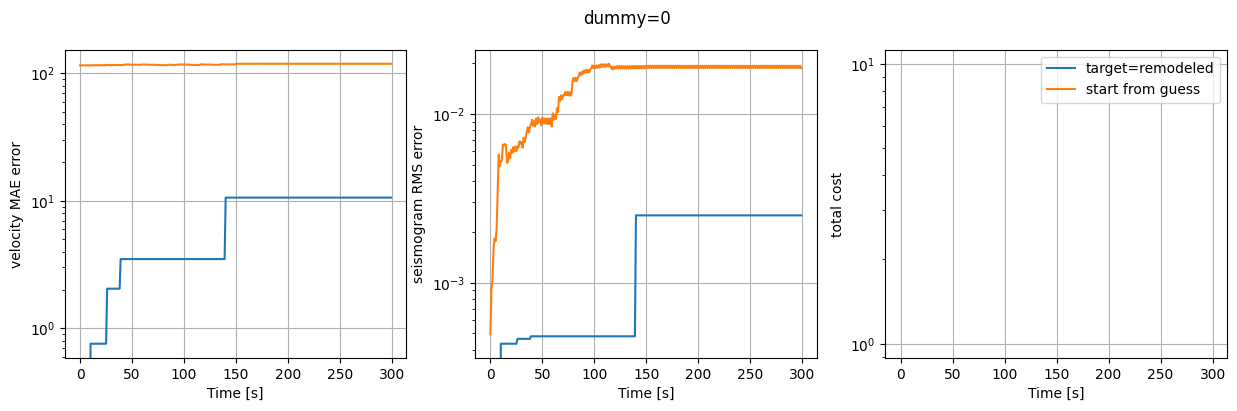

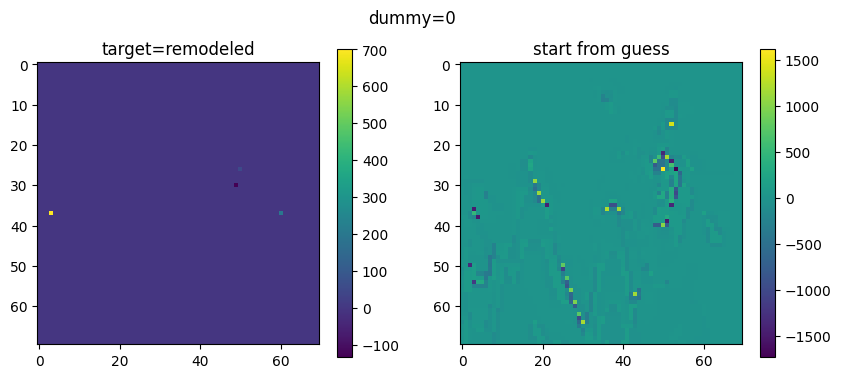

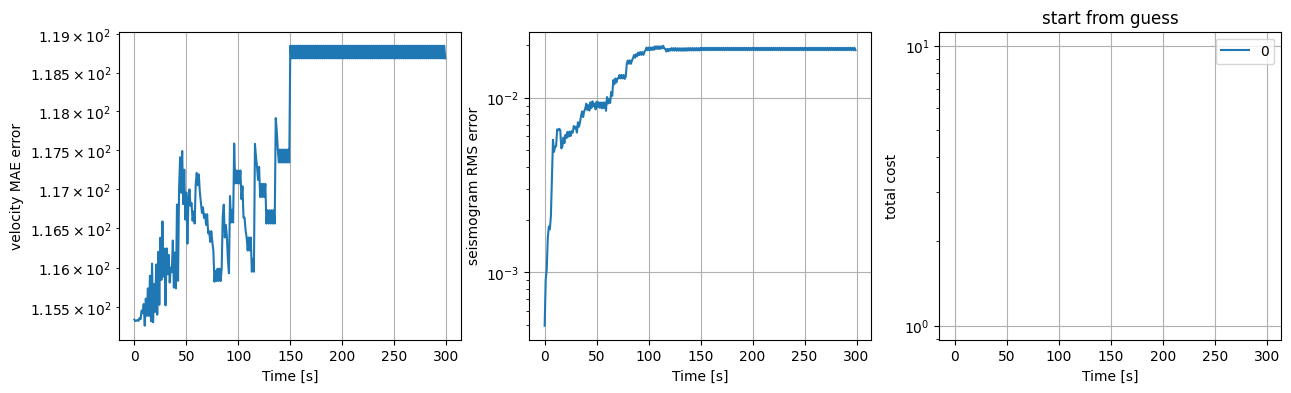

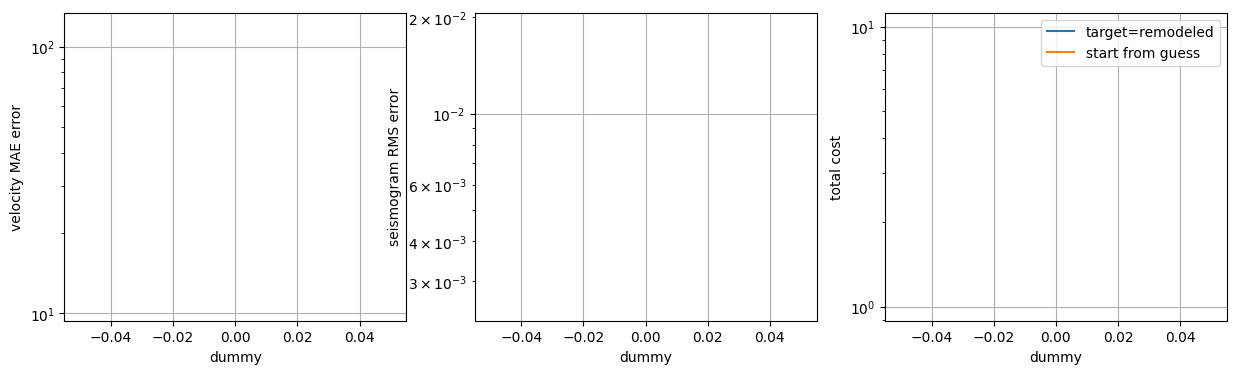

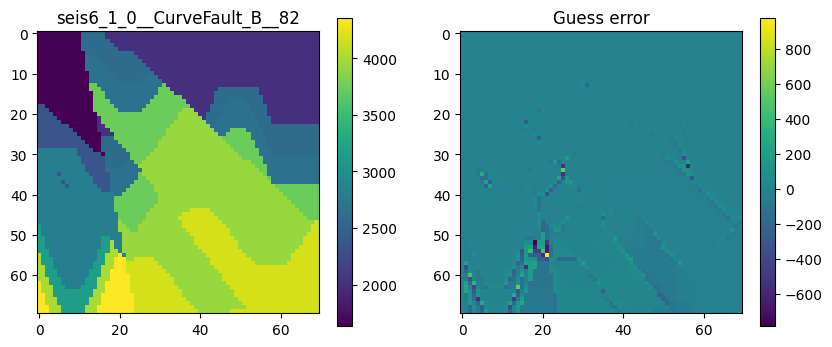

diag 0.0
diag 2.4176017578988677e-05


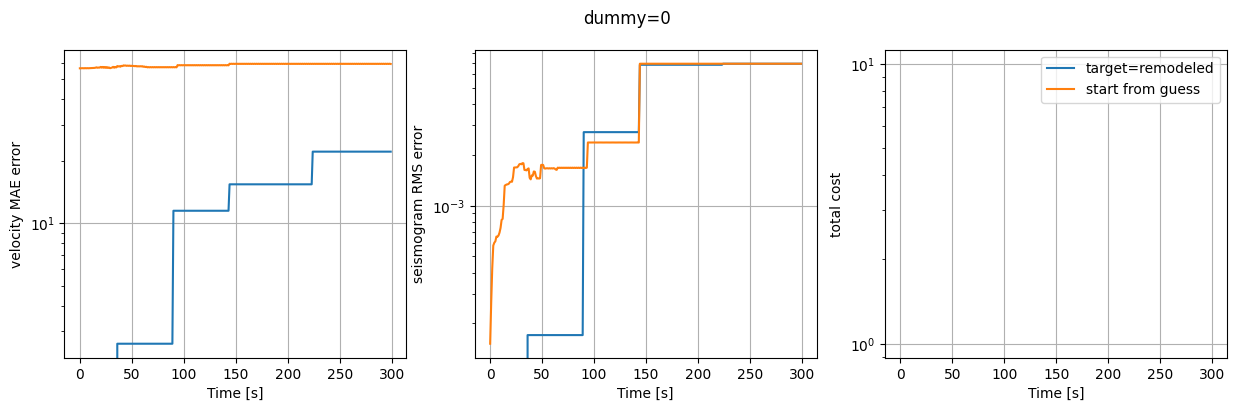

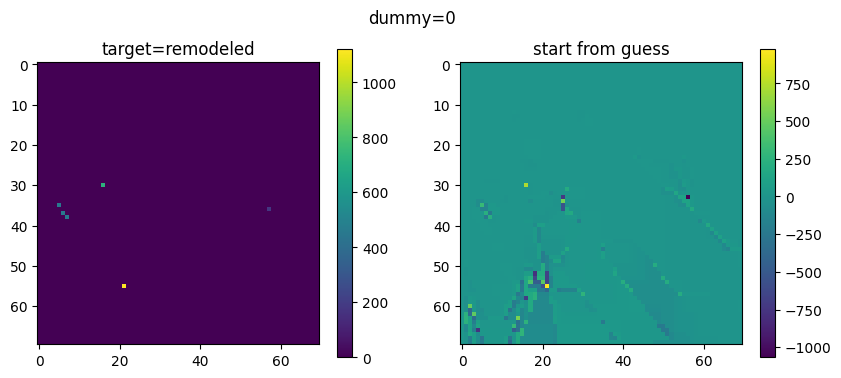

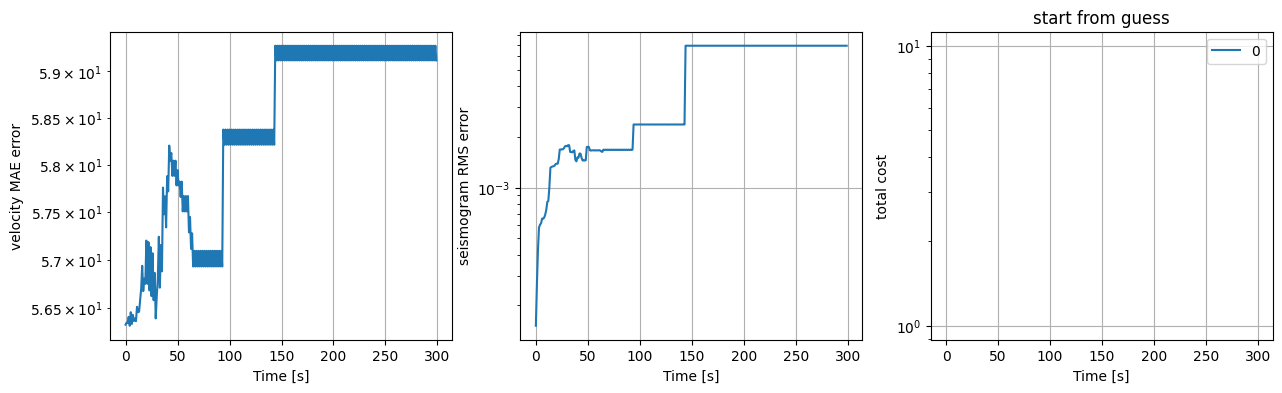

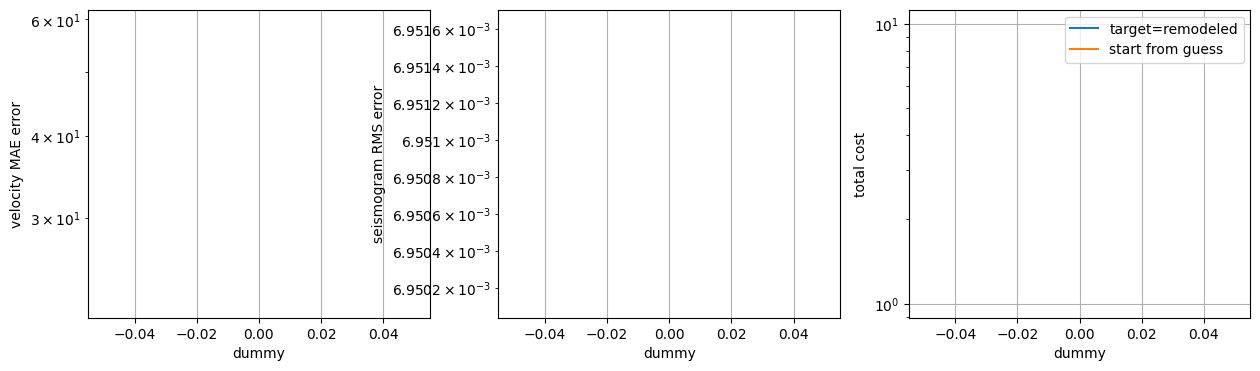

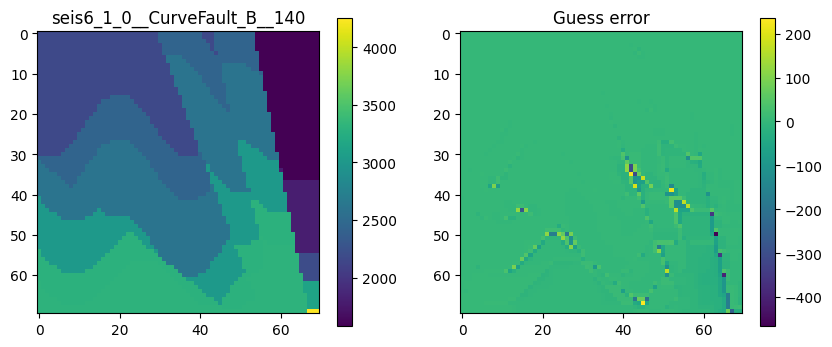

diag 0.0
diag 1.959674893285554e-05


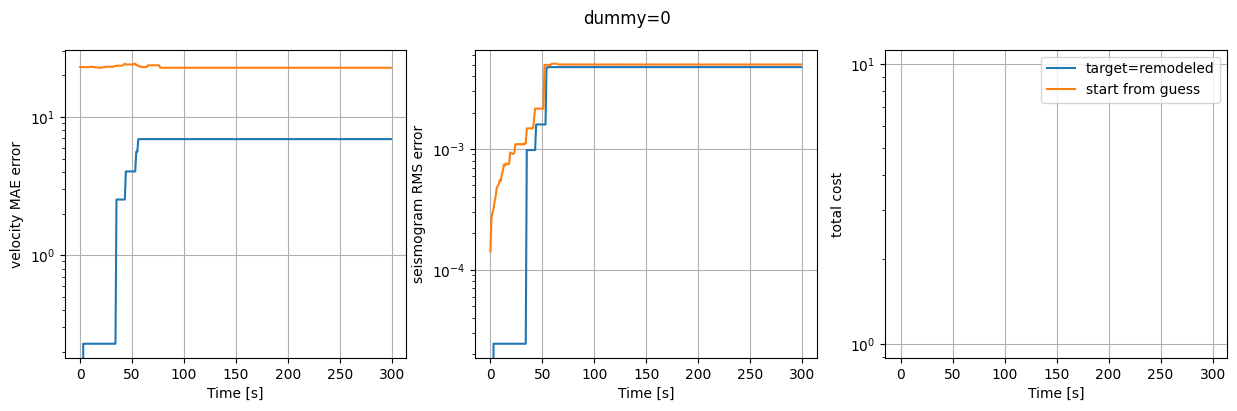

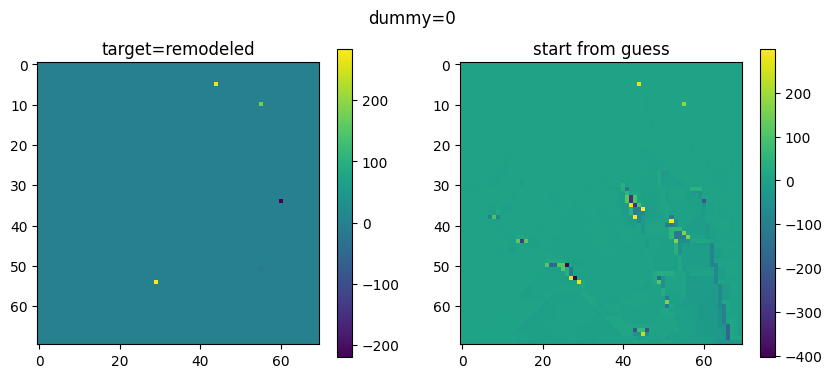

C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\IPython\core\events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


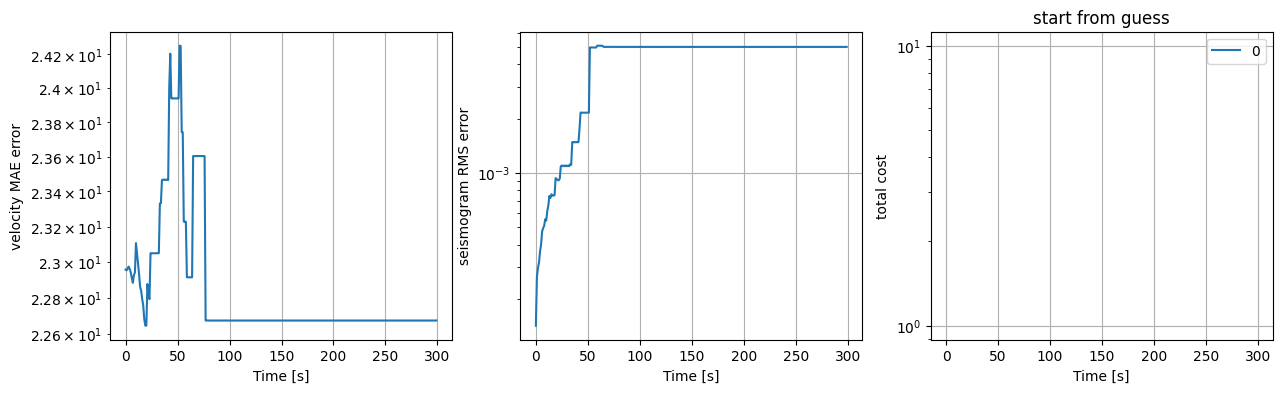

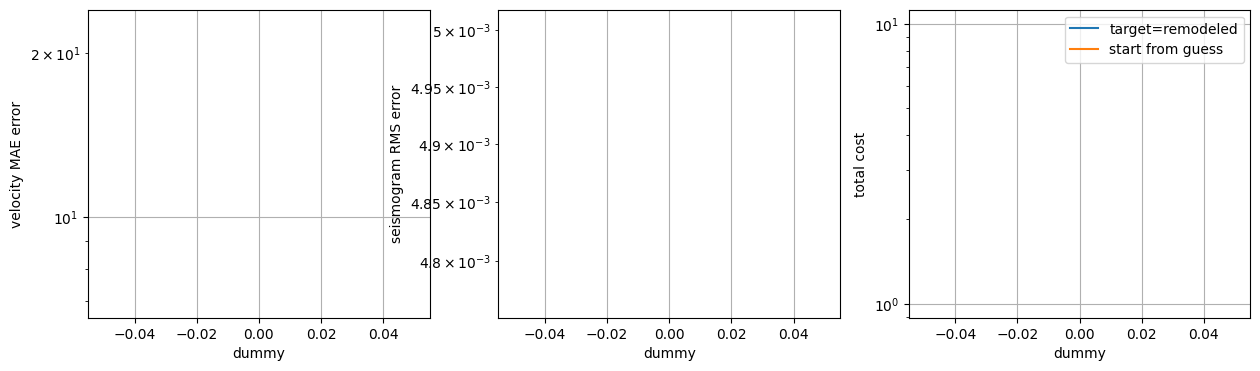

In [8]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
importlib.reload(seis_numerics)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
#model = seis_model.default_model().models[1].model_TV2D
#model.show_convergence = True
#model.iter_list = [1000]

#model = copy.deepcopy(seis_model.default_model().models[1].model_TV2D)
start_model = seis_model.model_TV2D()
start_model.train([],[])

model = seis_invert.Snap()
model.train([],[])
model.show_convergence=True

do_which_list = [True,False,True]

def param_func(model,value):        
    return model
    
param_values = [0]
param_name = "dummy"


for d in data[0:10]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0., start_model = start_model)

In [13]:
%debug

> f:\seismic\code\core\kaggle_support.py(564)infer()
    562 
    563         for d in test_data:
--> 564             d.velocity_guess.data += self.apply_offset
    565             d.velocity_guess.min_vel += self.apply_offset
    566             if self.round_results:



ipdb>  d


*** Newest frame


ipdb>  print(d)


Data(is_train=True, family='CurveFault_B', seismogram=Seismogram(filename='f:/seismic/data//train_samples\\CurveFault_B/seis6_1_0.npy', ind=282, data=None), velocity=Velocity(filename='f:/seismic/data//train_samples\\CurveFault_B/vel6_1_0.npy', ind=282, data=array([[2416., 2416., 2416., ..., 1799., 1799., 1799.],
       [2626., 2626., 2626., ..., 1799., 1799., 1799.],
       [2626., 2626., 2626., ..., 1799., 1799., 1799.],
       ...,
       [3967., 3967., 3967., ..., 4439., 4439., 4439.],
       [3967., 3967., 3967., ..., 4439., 4439., 4439.],
       [3967., 3967., 3967., ..., 4439., 4439., 4439.]]), min_vel=array(1799.)), velocity_guess=None, diagnostics={}, do_not_cache=False)


ipdb>  d.velocity


*** Newest frame


ipdb>  print(d.velocity)


Velocity(filename='f:/seismic/data//train_samples\\CurveFault_B/vel6_1_0.npy', ind=282, data=array([[2416., 2416., 2416., ..., 1799., 1799., 1799.],
       [2626., 2626., 2626., ..., 1799., 1799., 1799.],
       [2626., 2626., 2626., ..., 1799., 1799., 1799.],
       ...,
       [3967., 3967., 3967., ..., 4439., 4439., 4439.],
       [3967., 3967., 3967., ..., 4439., 4439., 4439.],
       [3967., 3967., 3967., ..., 4439., 4439., 4439.]]), min_vel=array(1799.))


ipdb>  print(d.velocity_guess)


None


ipdb>  q
